# Games Sales Data Analysis

### 1.0 Introduction

In this project we analyze data from an online store Ice that sells video games all over the world. It combines previous year's historic sales from this store, along with other open source information such as reviews, genres and platforms.

The purpose of this project is to identify patterns and forecast potential big winners and plan advertising campaigns based on the analysis.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st


In [2]:
# Import Dataset
df = pd.read_csv('/datasets/games.csv')
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10527,The Sims 4: City Living,PC,2016.0,Simulation,0.02,0.08,0.00,0.01,77.0,5.7,T
7009,Game & Wario,WiiU,2013.0,Misc,0.05,0.06,0.12,0.01,NaN,NaN,NaN
9451,The IdolM@ster: One for All,PS3,2014.0,Misc,0.00,0.00,0.13,0.00,NaN,NaN,NaN
4147,ICO,PS2,2001.0,Action,0.23,0.18,0.00,0.06,90.0,8.8,T
15388,Vampire Mansion: Linda Hyde,DS,2011.0,Adventure,0.00,0.02,0.00,0.00,NaN,NaN,E10+
1085,Madden NFL 2001,PS,2000.0,Sports,1.58,0.05,0.00,0.04,90.0,6.8,E
1681,TwinBee,NES,1986.0,Shooter,0.00,0.00,1.20,0.00,NaN,NaN,NaN
5344,The Wild Thornberrys Movie,GBA,2002.0,Platform,0.25,0.09,0.00,0.01,NaN,tbd,E
3523,Jampack Summer 2002,PS2,2002.0,Misc,0.28,0.22,0.00,0.07,NaN,tbd,NaN
9650,Peter Jacobsen's Golden Tee Golf,PS,2000.0,Sports,0.07,0.05,0.00,0.01,NaN,NaN,NaN


### 2.0 Prepare Data

In [3]:
# Make column names lowercase
df.columns = df.columns.str.lower()
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7675,Jikkyou Powerful Pro Yakyuu 2010,PSP,2010.0,Sports,0.00,0.00,0.20,0.00,NaN,NaN,NaN
8254,Iron Chef America: Supreme Cuisine,Wii,2008.0,Simulation,0.16,0.00,0.00,0.01,42.0,tbd,E10+
13810,Worms 4: Mayhem,XB,2005.0,Strategy,0.03,0.01,0.00,0.00,69.0,9.2,T
4521,Mobile Suit Gundam: Zeonic Front,PS2,2001.0,Simulation,0.09,0.07,0.25,0.02,71.0,8.8,T
13169,Ride,PS3,2015.0,Racing,0.00,0.03,0.01,0.01,NaN,4.8,NaN
11338,Charm Girls Club: My Fashion Show,DS,NaN,Simulation,0.08,0.00,0.00,0.01,NaN,tbd,E
15674,Pillars of Eternity,PC,2014.0,Role-Playing,0.00,0.02,0.00,0.00,89.0,8.3,M
7329,Momotarou Dentetsu 16,PS2,2006.0,Misc,0.00,0.00,0.21,0.00,NaN,NaN,NaN
14305,Nancy Drew: Alibi In Ashes,PC,2011.0,Adventure,0.03,0.00,0.00,0.00,NaN,tbd,E
8390,Batman Beyond: Return of the Joker,PS,2000.0,Action,0.09,0.06,0.00,0.01,NaN,4.3,NaN


In [4]:
# Check the data types and if incorrect convert data to the required types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


As it can be seen above - year_of_release should be an int data type, and user_score should be a float instead of a string object. In order to fix it, we will need to deal with the missing values in these columns first.

In [5]:
# Check for missing values
print(df.isna().sum())

# print(df.isnull().sum()/len(df))
mis_values = df.isnull().sum().to_frame('missing_values')
mis_values['%'] = round(df.isnull().sum()/len(df)*100 , 1)
mis_values.sort_values(by='%', ascending=False)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


,missing_values,%
critic_score,8578,51.3
rating,6766,40.5
user_score,6701,40.1
year_of_release,269,1.6
name,2,0.0
platform,0,0.0
genre,2,0.0
na_sales,0,0.0
eu_sales,0,0.0
jp_sales,0,0.0


It can be seen from the above that over 50% of the data is missing critic_score, and around 40% of data is missing user_score and rating. So we cannot just ignore or drop the rows with these missing values. Filling up the missing values with the mean or median is also not a great idea as it will skew the results since its such a major portion. The best option in this case is to leave the missing values as is so as to not include them in any data analysis.

On the other hand, there are only 2 missing values for the name, and 269 missing values for year_of_release, which is only around 1.6% of the entire dataset. These rows can be easily removed as they aren't of much significance to the rest of the data.

In [6]:
# Remove rows with missing values in name and year_of_release
df = df.dropna(subset=['name', 'year_of_release'])

In [7]:
# For the critic score, user score and rating, get the unique values to determine what the data looks like

print('Unique values of Critic Score')
print(df['critic_score'].unique())

print('\nUnique values of User Score')
print(df['user_score'].unique())

print('\nUnique values of Rating')
print(df['rating'].unique())


Unique values of Critic Score
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]

Unique values of User Score
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

Unique values of Rating
['E' nan 'M' 

The user_score is of the type string with values ranging from 0 to 10, and needs to be changed to float, which can only happen if the missing values are filled. There is also a 'tbd' rating, which just means that the user score has not been determined for these movies yet. 

To make the change from string to float, we can fill the missing values with -999, and the 'tbd' values with -111. For all data analaysis involving user_score, we will then have to filter out the data with positive values only to ensure this does not effect the analysis in anyway.

In [8]:
# Fill missing user_score with -999, and 'tbd' user_score with -111 so that it can be changed to a float type
df['user_score'] = df['user_score'].fillna(-999)
df.loc[df['user_score'] == 'tbd', 'user_score'] = -111

# Convert user_score data type to float
df['user_score'] = df['user_score'].astype('float')

In [9]:
# Check if its okay to convert year_of_release to int
print(np.array_equal(df['year_of_release'], df['year_of_release'].astype('int')))

# Convert year_of_release data type to int
df['year_of_release']= df['year_of_release'].astype('int')

True


In [10]:
# Check all data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [11]:
# Fill in missing values of rating with 'Unknown'
df['rating'] = df['rating'].fillna('Unknown')

In [12]:
# Check if all missing values have been dealt with as discussed
print(df.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score            0
rating                0
dtype: int64


It should be noted that user_score still has missing values that are filled with -999, and 'tbd' values filled with -111.

In [13]:
# Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3964,Harry Potter and the Half-Blood Prince,PSP,2009,Action,0.18,0.20,0.00,0.12,NaN,6.6,E,0.50
12293,Elite Forces: Unit 77,DS,2009,Strategy,0.06,0.00,0.00,0.00,61.0,-111.0,T,0.06
6427,Batman: Return to Arkham,PS4,2016,Action,0.07,0.16,0.00,0.04,73.0,8.5,T,0.27
7218,Nickelodeon Party Blast,XB,2002,Misc,0.16,0.05,0.00,0.01,19.0,4.3,E,0.22
11190,Battle Fantasia,X360,2008,Fighting,0.07,0.00,0.01,0.01,71.0,6.6,T,0.09
13934,Holly Hobbie & Friends,DS,2007,Misc,0.04,0.00,0.00,0.00,NaN,-999.0,Unknown,0.04
7653,Earth Defense Force: Insect Armageddon,PS3,2011,Shooter,0.06,0.04,0.08,0.02,63.0,7.0,T,0.20
7287,The Crew,X360,2014,Racing,0.06,0.14,0.00,0.02,NaN,6.4,T,0.22
6561,A.C.E.: Another Century's Episode 3: The Final,PS2,2007,Simulation,0.00,0.00,0.26,0.00,NaN,-999.0,Unknown,0.26
954,GoldenEye 007 (2010),Wii,2010,Action,0.84,0.70,0.13,0.16,NaN,-999.0,Unknown,1.83


### 3.0 Data Analysis

#### 3.1 Period of Significance

In [14]:
# How many games were released in different years. Is the data for every period significant?
games_per_year = df.groupby('year_of_release')['name'].count()
df_games_per_year = pd.DataFrame({'year_of_release':games_per_year.index, 'no_of_games':games_per_year}).reset_index(drop=True)
df_games_per_year


,year_of_release,no_of_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


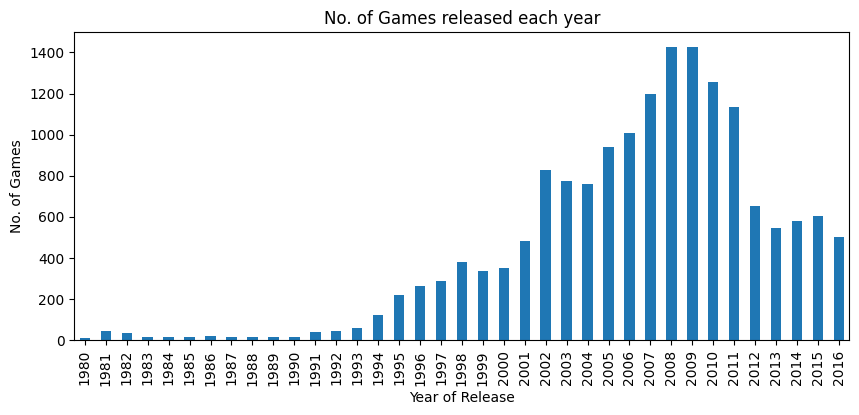

In [15]:
# Bar graph of games released in different years
df_games_per_year.plot(kind = 'bar',
                x = 'year_of_release',
                y = 'no_of_games',
                title = 'No. of Games released each year',
                xlabel = 'Year of Release',
                ylabel = 'No. of Games',
                legend = False,
                figsize = [10,4])
plt.xticks(rotation=90)
plt.show()

It can be seen that less than 60 games were released between the years of 1980 and 1993, so they were not very significant. 1994 onwards games started getting released in numbers over 100 and it seemes like the gaming industry started picking up, with the actual significant period starting from 2001 onwards with over 400 games released each year. 

The data for 2016 is not complete so that has also been disregarded.

For the puposes of this data analysis, only games released after 2013 and before 2016 (2013 - 2015) are considered to understand current market trends and predict future trends.

In [16]:
# Choose games from years that are significant
df_filtered_with_year = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] < 2016)]


#### 3.2 Sales based on various Platforms

In [17]:
# Look at how sales varied from platform to platform

# Helper function to get the sum sales for something grouped by in the dataframe
def group_sum_sales(inputdf, groupby_column, sales_market):
    sales_per_groupbycol = inputdf.groupby(groupby_column)[sales_market].sum()
    sales_per_groupbycol = sales_per_groupbycol.sort_values(ascending = False)
    df_sales_per_groupbycol = pd.DataFrame({groupby_column:sales_per_groupbycol.index, sales_market:sales_per_groupbycol}).reset_index(drop=True)
    return df_sales_per_groupbycol


df_sales_per_platform = group_sum_sales(df_filtered_with_year, 'platform', 'total_sales')
df_sales_per_platform



,platform,total_sales
0,PS4,244.89
1,PS3,177.83
2,X360,135.28
3,XOne,133.17
4,3DS,128.11
5,WiiU,60.03
6,PC,34.18
7,PSV,28.74
8,Wii,13.48
9,PSP,3.50


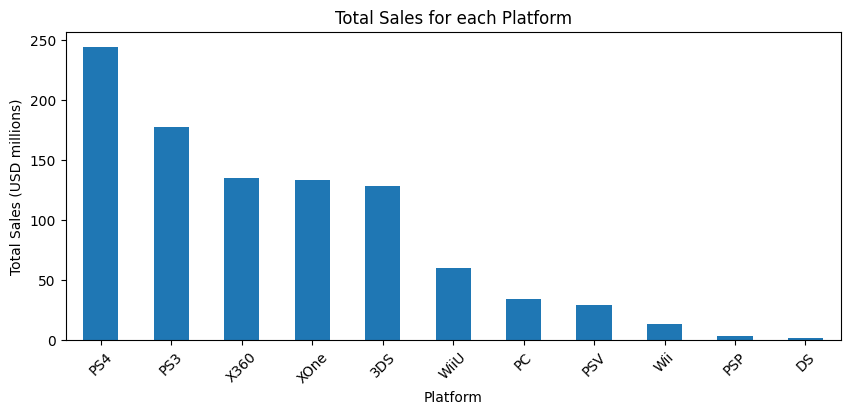

In [18]:
# Bar graph of total sales in each platform
df_sales_per_platform.plot(kind = 'bar',
                x = 'platform',
                y = 'total_sales',
                title = 'Total Sales for each Platform',
                xlabel = 'Platform',
                ylabel = 'Total Sales (USD millions)',
                legend = False,
                figsize = [10,4])
plt.xticks(rotation=45)
plt.show()

It can be seen that platforms that had total sales of less than 10 million USD have faded. For analysis on platforms with greatest total sales, only platforms with total sales over 100 million USD since 2013 are considered.

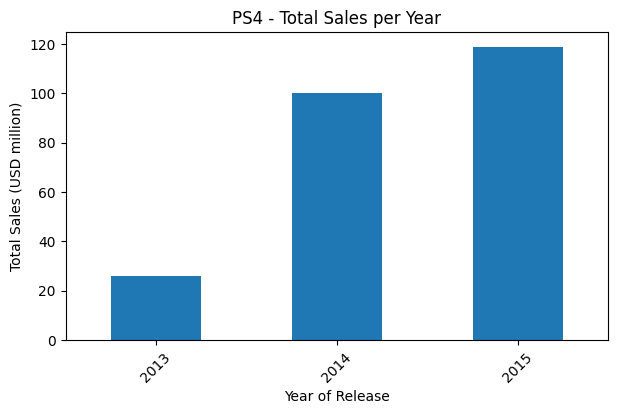

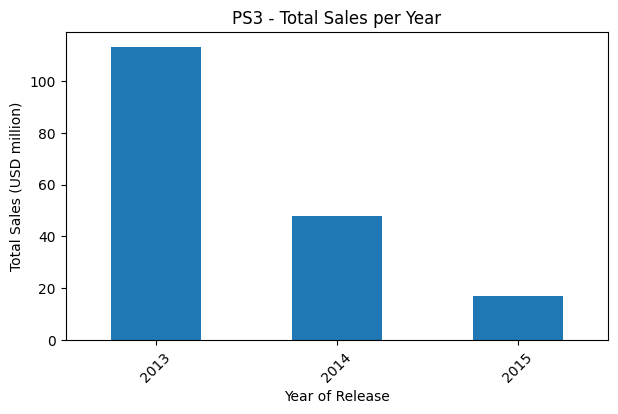

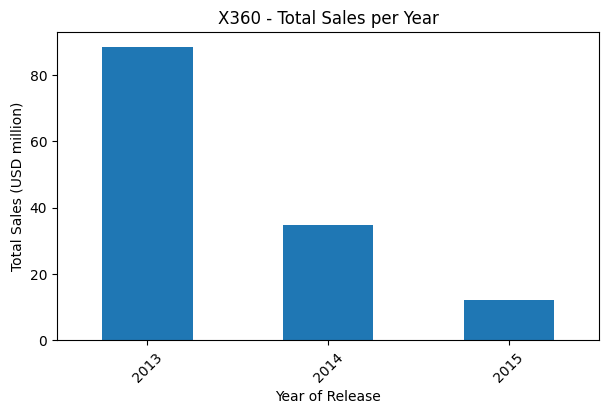

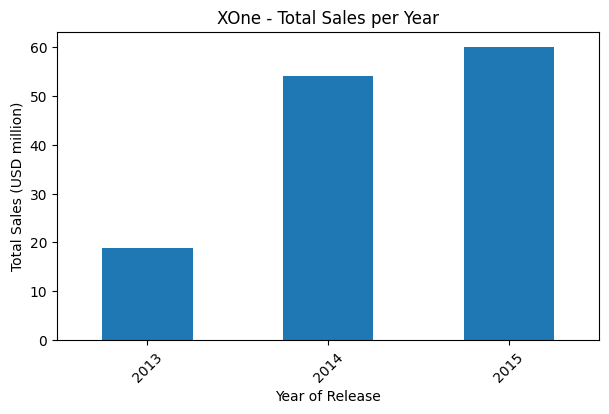

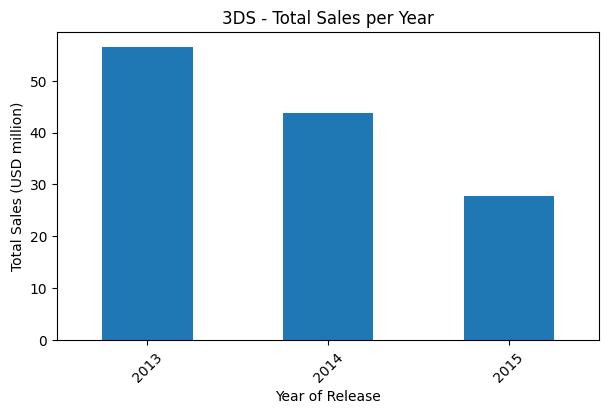

In [19]:
# Choose the platforms with the greatest total sales and build a distribution based on data for each year. 

def bar_sales_per_year_platform (platform_name):
    df_filtered_with_platform = df_filtered_with_year[df_filtered_with_year['platform'] == platform_name]
    platform_sales = df_filtered_with_platform.groupby('year_of_release')['total_sales'].sum()
    df_platform_sales = pd.DataFrame({'year_of_release':platform_sales.index, 'total_sales':platform_sales}).reset_index(drop=True)

    df_platform_sales.plot(kind = 'bar',
                x = 'year_of_release',
                y = 'total_sales',
                title = platform_name + ' - Total Sales per Year',
                xlabel = 'Year of Release',
                ylabel = 'Total Sales (USD million)',
                legend = False,
                figsize = [7,4])
    plt.xticks(rotation=45)
    plt.show()

# Get a list of platforms that have total sales over 100 million USD
platforms_with_significant_sales = df_sales_per_platform[df_sales_per_platform['total_sales'] > 100]
platforms_with_significant_sales = platforms_with_significant_sales['platform'].to_list()


for platform in platforms_with_significant_sales:
    bar_sales_per_year_platform(platform)



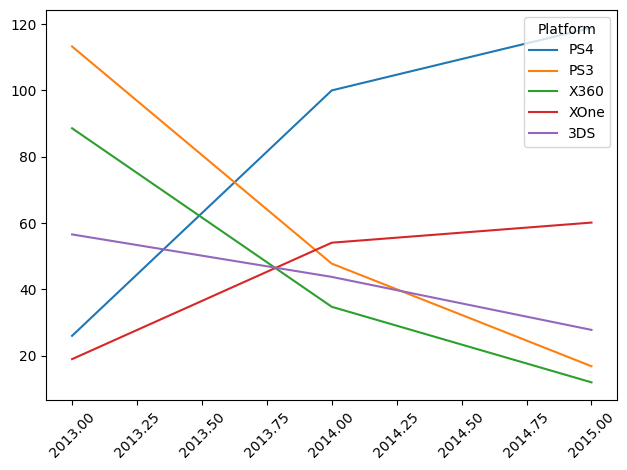

In [20]:
# Find platforms that used to be popular but now have zero sales. 

# Only platforms with over 100 million in sales are chosen to be analysed as those are the popular ones.
popular_platforms = df_sales_per_platform[df_sales_per_platform['total_sales'] > 100]
popular_platforms = popular_platforms['platform'].to_list()

legend=[]

# Helper function to create multiple line graphs for platforms with total sales vs year of release
def line_sales_per_year_platform (inputdf, platform_name, inputlegend):
    df_filtered_with_platform = inputdf[inputdf['platform'] == platform_name]
    platform_sales = df_filtered_with_platform.groupby('year_of_release')['total_sales'].sum()
    df_platform_sales = pd.DataFrame({'year_of_release':platform_sales.index, 'total_sales':platform_sales}).reset_index(drop=True)
    
    plt.plot(df_platform_sales['year_of_release'], df_platform_sales['total_sales'], label=platform_name)
   
    inputlegend.append(platform_name)
    
for platform in popular_platforms:
    line_sales_per_year_platform(df_filtered_with_year, platform, legend)


plt.xlabel = 'Release Year'
plt.ylabel = 'Total Sales (in USD million)'
plt.xticks(rotation=45)
plt.legend(legend, title='Platform')
plt.tight_layout()
plt.show()


PS3, X360, and 3DS used to be ver popular platforms but have zero sales now. This makes sense as there is a newer version PlayStation as PS4, so PS3 is getting phased out, and 3DS is losing its popularity so there is probably a new Nintendo console coming up as well.

Looking at the graphs above, it generally takes 5 years for new platforms to appear and old ones to fade. The period 2013 onwards is selected for analysis here to understand the current market trend as its within that 5 year timeframe.

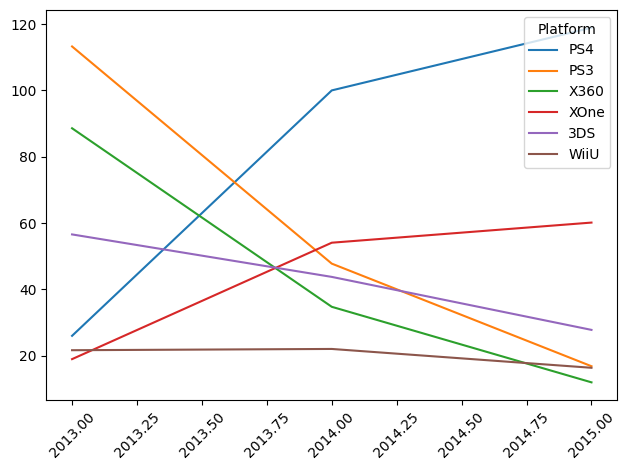

In [21]:
# Which platforms are leading in sales? Which ones are growing or shrinking? 

# To get which platforms are leading and shrinking in sales, only most recent data from 2010 onwards is used. 
df_filtered_recent_years = df_filtered_with_year[df_filtered_with_year['year_of_release'] > 2011]
df_recent_sales_per_platform = group_sum_sales(df_filtered_recent_years, 'platform', 'total_sales')

# Get only the top platforms from the recent years
recent_platforms = df_recent_sales_per_platform[df_recent_sales_per_platform['total_sales'] > 50]
recent_platforms = recent_platforms['platform'].to_list()
legend_recent = []

for platform in recent_platforms:
    line_sales_per_year_platform(df_filtered_recent_years, platform, legend_recent)


plt.xlabel = 'Release Year'
plt.ylabel = 'Total Sales (in USD million)'
plt.xticks(rotation=45)
plt.legend(legend_recent, title='Platform')
plt.tight_layout()
plt.show()


PS3 and PS4 had the most sales in the recent years, but PS4 and Xbox One are growing whereas PS3 and 3DS and Xbox 360 are shrinking in sales. This makes sense PS4 is the newer upgrade version of PS3, so as sales from PS4 are growing, sales from PS3 are shrinking. Same is true for Xbox One as its the newer upgrade version of Xbox 360.

Some of the potentially profitable platforms right now is PS4 and XboxOne. WiiU and PC games have can also be considered profitable but with a lower margin, they have steady sales over the years and don't seem to be shrinking or growing

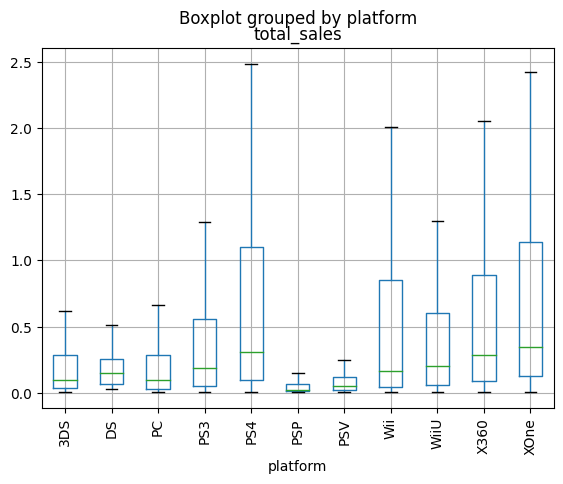

In [22]:
# Build a box plot for the global sales of all games, broken down by platform. 

# plt.figure(figsize=(12, 6))
df_filtered_with_year.boxplot(column='total_sales', by='platform', showfliers = False)
# plt.title('Total Sales by Platform')
# plt.suptitle(' ')
# plt.xlabel('Platform')
# plt.ylabel('Total Sales (in Millions)')

plt.title = 'Total Sales by Platform'
plt.suptitle = ' ' 
plt.xlabel = 'Platform'
plt.ylabel = 'Total Sales (in Millions)'
plt.xticks(rotation=90)
plt.show()


There are significant differences in sales as shown in the above box plot. Wii for example has a game that had sales for over 80 million USD. On the other hand, DS also has some games with remarkable sales. There are some platforms with very minimal sales such as DC, GB, N64, and WS.


In [23]:
# What about average sales on various platforms?

sales_per_platform_avg = df_filtered_with_year.groupby('platform')['total_sales'].mean()
sales_per_platform_avg = sales_per_platform_avg.sort_values(ascending = False)
df_sales_per_platform_avg = pd.DataFrame({'platform':sales_per_platform_avg.index, 'avg_total_sales':sales_per_platform_avg}).reset_index(drop=True)
df_sales_per_platform_avg



,platform,avg_total_sales
0,PS4,1.074079
1,XOne,0.832312
2,X360,0.781965
3,Wii,0.612727
4,WiiU,0.594356
5,PS3,0.579251
6,3DS,0.498482
7,PC,0.253185
8,DS,0.192500
9,PSV,0.105275


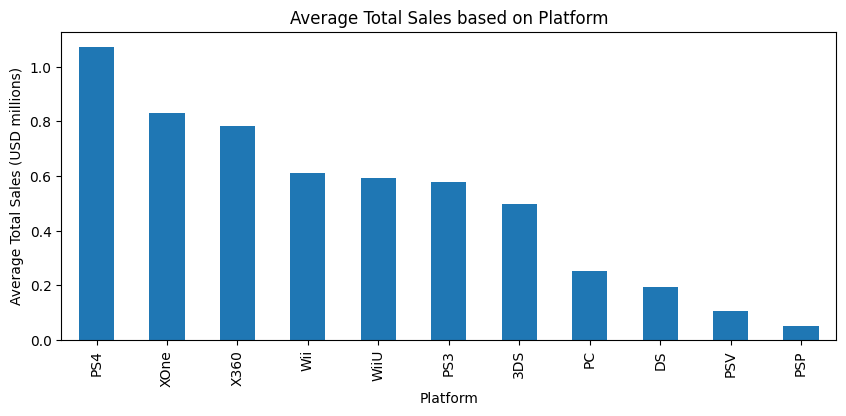

In [24]:
df_sales_per_platform_avg.plot(kind = 'bar',
                x = 'platform',
                y = 'avg_total_sales',
                title = 'Average Total Sales based on Platform',
                xlabel = 'Platform',
                ylabel = 'Average Total Sales (USD millions)',
                legend = False,
                figsize = [10,4])
plt.xticks(rotation=90)
plt.show()

On average, PS4 had the highest average sales, followed by XOne, and then X360. This is similar to the graph on top for total sales, except PS3 and X360 are second and third highest grossing in total sales there, whereas PS3 is on a bit of a lower end here.

#### 3.3 Sales based on Reviews

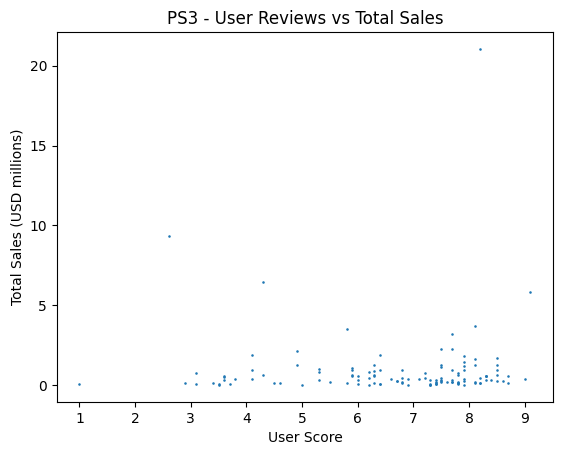

Correlation Coefficient for User Reviews vs Total Sales
0.02269094327112414


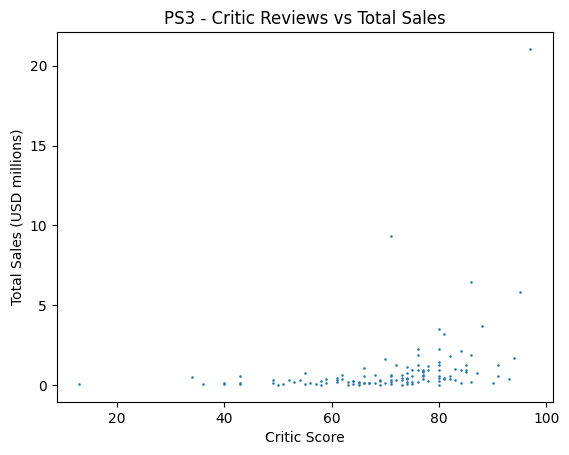

Correlation Coefficient for Critic Reviews vs Total Sales
0.33380663565061736


In [25]:
# Take a look at how user and professional reviews affect sales for one popular platform - PS3. 
# Build a scatter plot and calculate the correlation between reviews and sales

# We determined earlier that 50% of data was missing critic score, and 40% was missing user_score and rating
# Filtering it out here
df_no_na_reviews = df_filtered_with_year.dropna()
df_no_na_reviews = df_no_na_reviews[df_no_na_reviews['user_score'] > 0]
df_no_na_reviews_ps3 = df_no_na_reviews[df_no_na_reviews['platform'] == 'PS3']

df_no_na_reviews_ps3.plot(kind = 'scatter',
                      x = 'user_score',
                      y = 'total_sales',
                      xlabel = 'User Score',
                      ylabel = 'Total Sales (USD millions)',
                      title = 'PS3 - User Reviews vs Total Sales',
                      s = 0.7)
plt.show()
print ('Correlation Coefficient for User Reviews vs Total Sales')
print(df_no_na_reviews_ps3['user_score'].corr(df_no_na_reviews_ps3['total_sales']))

df_no_na_reviews_ps3.plot(kind = 'scatter',
                      x = 'critic_score',
                      y = 'total_sales',
                      xlabel = 'Critic Score',
                      ylabel = 'Total Sales (USD millions)',
                      title = 'PS3 - Critic Reviews vs Total Sales',
                      s = 0.7)
plt.show()
print ('Correlation Coefficient for Critic Reviews vs Total Sales')
print(df_no_na_reviews_ps3['critic_score'].corr(df_no_na_reviews_ps3['total_sales']))



There seems to be a strong correlation between critic scores and total sales, with the correlation coefficient being 0.43, as compared to almost no correlation between user score and sales which has a correlation coefficient of 0.146.

This makes sense as most people take professional critic reviews more seriously as compared to user reviews.

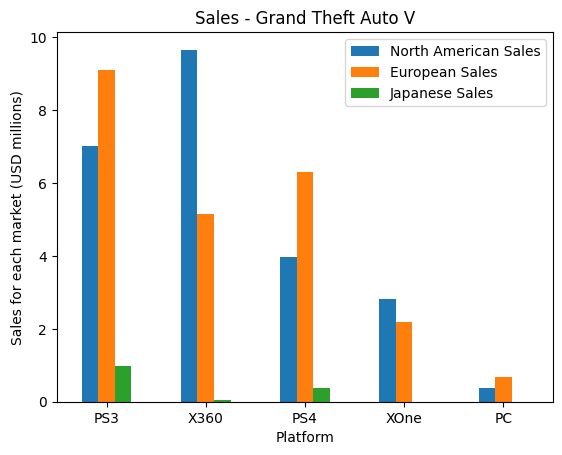

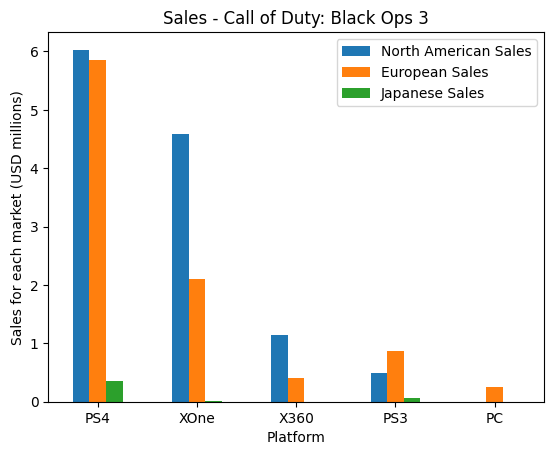

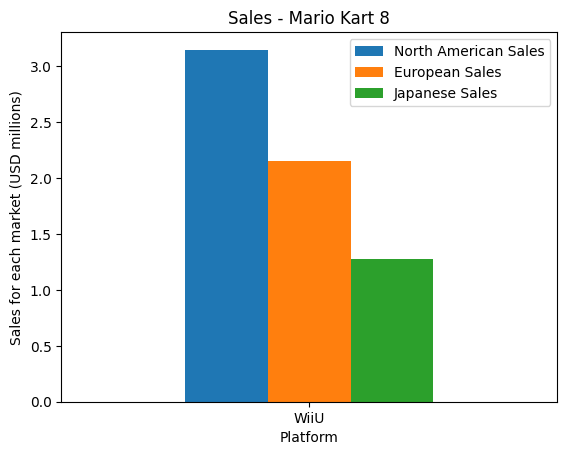

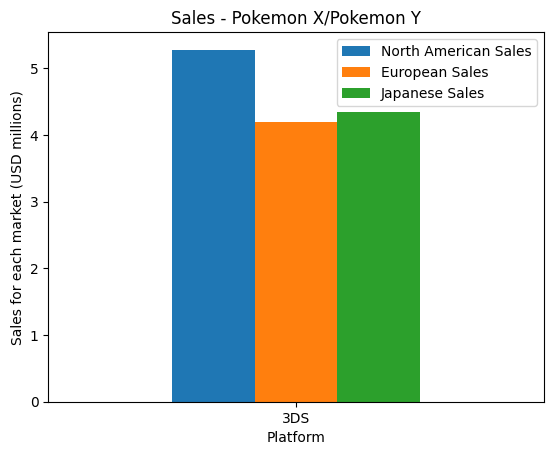

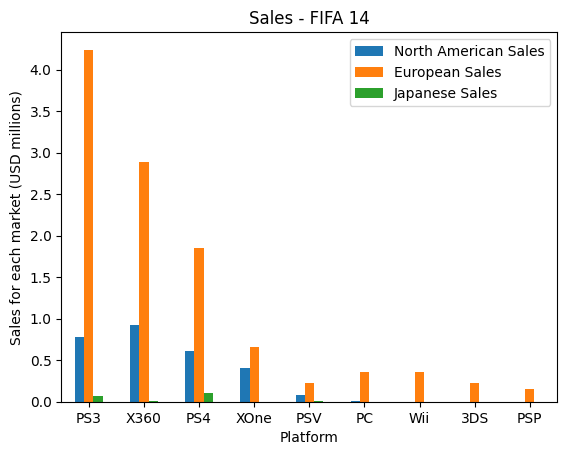

In [26]:
# Keeping your conclusions in mind, compare the sales of the same games on other platforms 

df_filtered = df_filtered_with_year.sort_values(by='total_sales', ascending = False)
df_filtered.head(50)

# Helper function to plot bar graphs for game sales on different platforms and market
def games_different_platform(inputdf, game):
    inputdf.plot(kind = 'bar',
            x = 'platform',
            y = ['na_sales', 'eu_sales', 'jp_sales'],
            title = 'Sales - ' + game,
            xlabel = 'Platform',
            ylabel = 'Sales for each market (USD millions)')
    plt.legend(['North American Sales', 'European Sales', 'Japanese Sales'])
    plt.xticks(rotation=0)
    plt.show()


# Grand Theft Auto V
df_gta = df_filtered_with_year[df_filtered_with_year['name'] == 'Grand Theft Auto V']
games_different_platform(df_gta, 'Grand Theft Auto V')

# Call of Duty: Black Ops 3
df_cod = df_filtered_with_year[df_filtered_with_year['name'] == 'Call of Duty: Black Ops 3']
games_different_platform(df_cod, 'Call of Duty: Black Ops 3')

# Mario Kart 8
df_mario_kart = df_filtered_with_year[df_filtered_with_year['name'] == 'Mario Kart 8']
games_different_platform(df_mario_kart, 'Mario Kart 8')

# Pokemon X/Pokemon Y
df_pokemon = df_filtered_with_year[df_filtered_with_year['name'] == 'Pokemon X/Pokemon Y']
games_different_platform(df_pokemon, 'Pokemon X/Pokemon Y')

# FIFA 14
df_fifa = df_filtered_with_year[df_filtered_with_year['name'] == 'FIFA 14']
games_different_platform(df_fifa, 'FIFA 14')



For some of the popular games such as Call of Duty and Grand Theft Auto, it can be seen that they are released on different platforms. Playstation platforms seem to be more popular in the European market as compared to the North American market, where the XBox platforms are more popular in the North Amerian market.

It is also interesting to note that some games in the Platform category such as FIFA 14 are very popular in the European market, but not as popular in North America with minimal sales in Japan.

Based on the above graphs, it can be also seen that some games are released for one platform only. This is mainly true for Nintendo platforms such as Wii and DS and some of the games they release are for their platform only and not cross compatible with other platforms.

#### 3.4 Sales based on Genre

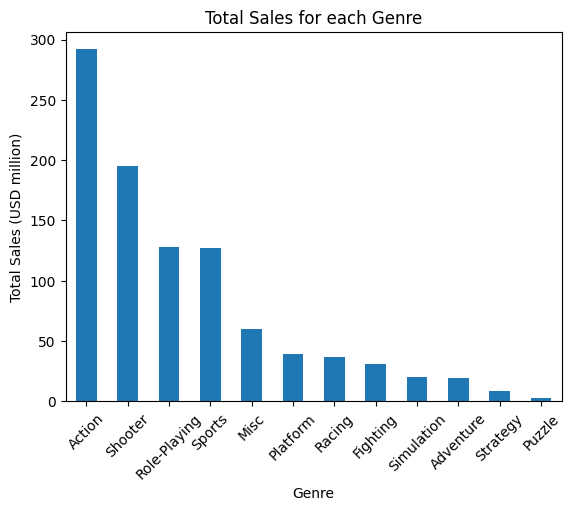

In [27]:
# Take a look at the general distribution of games by genre
df_sales_per_genre = group_sum_sales(df_filtered_with_year, 'genre', 'total_sales')


df_sales_per_genre.plot(kind = 'bar',
                x = 'genre',
                y = 'total_sales',
                title = 'Total Sales for each Genre',
                xlabel = 'Genre',
                ylabel = 'Total Sales (USD million)',
                legend = False)
plt.xticks(rotation=45)
plt.show()


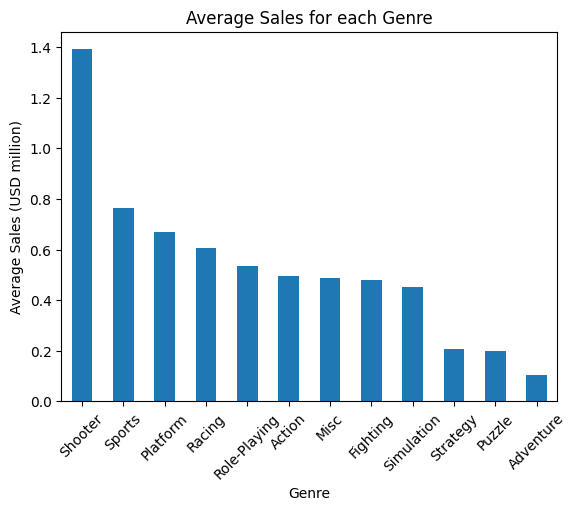

In [28]:
# General distribution of games by genre compared to average sales
avg_sales_per_genre = df_filtered_with_year.groupby('genre')['total_sales'].mean()
avg_sales_per_genre = avg_sales_per_genre.sort_values(ascending = False)
df_avg_sales_per_genre = pd.DataFrame({'genre':avg_sales_per_genre.index, 'avg_total_sales':avg_sales_per_genre}).reset_index(drop=True)


df_avg_sales_per_genre.plot(kind = 'bar',
                x = 'genre',
                y = 'avg_total_sales',
                title = 'Average Sales for each Genre',
                xlabel = 'Genre',
                ylabel = 'Average Sales (USD million)',
                legend = False)
plt.xticks(rotation=45)
plt.show()


Action genre is the most profitable genre, followed by Shooter in terms of total revenue. The genres with the least sales are Puzzle and Strategy. On the other hand Shooter genre is the most profitable in terms of average revenue per game, followed by Sports.

The difference between the total sales from Action and Shooter to other genres is quite significant, and so is the difference between average sales from Shooter to other categories, which makes it okay to conclude that games in the Action and Shooter genre are the most profitable.

### 4.0 User Profile for each region

In [29]:
# For each region (NA, EU, JP), determine the top five platforms

print('Top 5 platforms in North America')
df_na_sales_per_platform = group_sum_sales(df_filtered_with_year, 'platform', 'na_sales')[:5]
print(df_na_sales_per_platform)

print('\nTop 5 platforms in Europe')
df_eu_sales_per_platform = group_sum_sales(df_filtered_with_year, 'platform', 'eu_sales')[:5]
print(df_eu_sales_per_platform)

print('\nTop 5 platforms in Japan')
df_jp_sales_per_platform = group_sum_sales(df_filtered_with_year, 'platform', 'jp_sales')[:5]
print(df_jp_sales_per_platform)


Top 5 platforms in North America
  platform  na_sales
0      PS4     87.25
1     X360     80.97
2     XOne     78.85
3      PS3     62.83
4      3DS     34.06

Top 5 platforms in Europe
  platform  eu_sales
0      PS4    109.31
1      PS3     66.55
2     XOne     41.96
3     X360     41.81
4      3DS     28.63

Top 5 platforms in Japan
  platform  jp_sales
0      3DS     59.78
1      PS3     22.05
2      PSV     15.03
3      PS4     10.22
4     WiiU     10.21


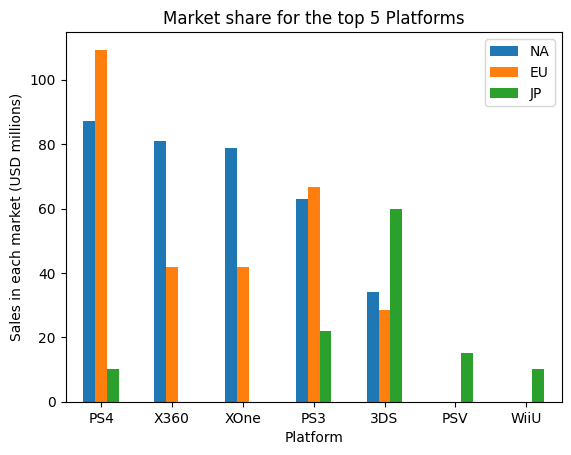

In [30]:
# Plot the market share for the top 5 platforms in each market
df_platforms_market = df_na_sales_per_platform.merge(df_eu_sales_per_platform,on='platform', how='outer').merge(df_jp_sales_per_platform ,on='platform', how='outer')

df_platforms_market.plot(kind = 'bar',
         x = 'platform',
         y = ['na_sales', 'eu_sales', 'jp_sales'],
         xlabel = 'Platform',
         ylabel = 'Sales in each market (USD millions)',
         title = 'Market share for the top 5 Platforms')
plt.legend(['NA', 'EU', 'JP'])
plt.xticks(rotation=0)
plt.show()

Overall North American market takes the lead in PS4, X360, and XOne, and Eurpean market takes the lead in PS4, PS3, then XOne and X360. 

On the other hand, 3DS is the most popular platform in Japan, followd by PS3, then PSV and WiiU, which don't do as well in the North American or European Market. It also seems like the XBox platforms are not popular in Japan at all.

In [31]:
# For each region (NA, EU, JP), determine the top five genres

print('Top 5 genre in North America')
df_na_sales_per_genre = group_sum_sales(df_filtered_with_year, 'genre', 'na_sales')[:5]
print(df_na_sales_per_genre)

print('\nTop 5 genre in Europe')
df_eu_sales_per_genre = group_sum_sales(df_filtered_with_year, 'genre', 'eu_sales')[:5]
print(df_eu_sales_per_genre)

print('\nTop 5 genre in Japan')
df_jp_sales_per_genre = group_sum_sales(df_filtered_with_year, 'genre', 'jp_sales')[:5]
print(df_jp_sales_per_genre)


Top 5 genre in North America
          genre  na_sales
0        Action    116.76
1       Shooter     93.50
2        Sports     57.73
3  Role-Playing     40.51
4          Misc     26.73

Top 5 genre in Europe
          genre  eu_sales
0        Action    107.45
1       Shooter     71.96
2        Sports     48.51
3  Role-Playing     32.69
4          Misc     19.38

Top 5 genre in Japan
          genre  jp_sales
0  Role-Playing     44.43
1        Action     33.42
2          Misc      8.16
3      Fighting      6.90
4       Shooter      5.55


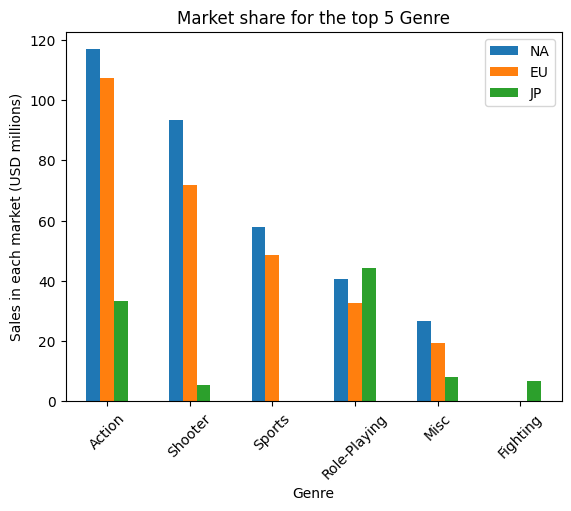

In [32]:
# Plot the market share for the top 5 genres in each market
df_genre_market = df_na_sales_per_genre.merge(df_eu_sales_per_genre,on='genre', how='outer').merge(df_jp_sales_per_genre ,on='genre', how='outer')

df_genre_market.plot(kind = 'bar',
         x = 'genre',
         y = ['na_sales', 'eu_sales', 'jp_sales'],
         xlabel = 'Genre',
         ylabel = 'Sales in each market (USD millions)',
         title = 'Market share for the top 5 Genre')
plt.legend(['NA', 'EU', 'JP'])
plt.xticks(rotation=45)
plt.show()

For the most part, the North American market and European market follow a similar trend and have Action as the most popular genre, followed by Shooter then Sports. However, it is interesting to note that Japanese market follows a very different trend where their highest profitable genre is Role-Playing, and they don't do well with Shooter or Sports genre games.

In [33]:
# For each region (NA, EU, JP), determine the top five ESRB rating categories

print('Top 5 ESRB ratings in North America')
df_na_sales_per_esrb = group_sum_sales(df_filtered_with_year, 'rating', 'na_sales')[:5]
print(df_na_sales_per_esrb)

print('\nTop 5 ESRB ratings in Europe')
df_eu_sales_per_esrb = group_sum_sales(df_filtered_with_year, 'rating', 'eu_sales')[:5]
print(df_eu_sales_per_esrb)

print('\nTop 5 ESRB ratings in Japan')
df_jp_sales_per_esrb = group_sum_sales(df_filtered_with_year, 'rating', 'jp_sales')[:5]
print(df_jp_sales_per_esrb)

Top 5 ESRB ratings in North America
    rating  na_sales
0        M    149.54
1  Unknown     80.89
2        E     71.08
3     E10+     50.43
4        T     40.84

Top 5 ESRB ratings in Europe
    rating  eu_sales
0        M    128.78
1  Unknown     71.44
2        E     69.75
3     E10+     38.88
4        T     32.16

Top 5 ESRB ratings in Japan
    rating  jp_sales
0  Unknown     70.73
1        T     18.32
2        E     14.07
3        M     12.91
4     E10+      5.44


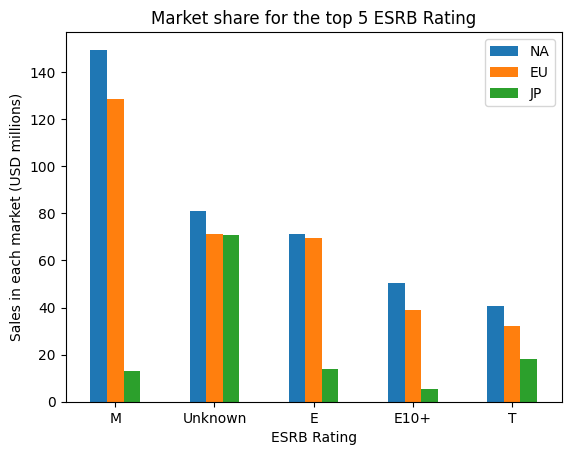

In [34]:
# Plot the market share for the top 5 ESRB rating categories in each market
df_esrb_market = df_na_sales_per_esrb.merge(df_eu_sales_per_esrb,on='rating', how='outer').merge(df_jp_sales_per_esrb ,on='rating', how='outer')

df_esrb_market.plot(kind = 'bar',
         x = 'rating',
         y = ['na_sales', 'eu_sales', 'jp_sales'],
         xlabel = 'ESRB Rating',
         ylabel = 'Sales in each market (USD millions)',
         title = 'Market share for the top 5 ESRB Rating')
plt.legend(['NA', 'EU', 'JP'])
plt.xticks(rotation=0)
plt.show()

It seems like ESRB rating affects sales a bit in North America and Europe regions. The M (Mature) rating is the most popular one for these two regions, followed by Unknown and then E (Everyone) but with a huge difference. Japan region however deviates from that and the Unknown rating category is the most popular there, which leads to the conclusion that rating is not a huge deal in the Japanese market and doesn't affect sales much there.

### 5.0 Testing Hypothesis

Null Hypothesis (H null): Average user ratings of the Xbox One and PC platforms are the same.

Alternative Hypothesis (H alternative): Average user ratings of the Xbox One and PC platforms are not necessarily the same.

In [35]:
# Average user ratings of the Xbox One and PC platforms are the same. 

# Get separate dataframes for Xbox One and PC platforms
df_xboxone = df_filtered_with_year[df_filtered_with_year['platform'] == 'XOne']
df_pc = df_filtered_with_year[df_filtered_with_year['platform'] == 'PC']

print('Variance of user ratings of the XBox One platform games')
print(np.var(df_xboxone['user_score']))

print('Variance of user ratings of the PC platform games')
print(np.var(df_pc['user_score']))
print('\n')

alpha = 0.05
results = st.ttest_ind(df_xboxone['user_score'], df_pc['user_score'], equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis')


Variance of user ratings of the XBox One platform games
191799.59717343748
Variance of user ratings of the PC platform games
137291.78975253773


p-value:  0.04938001884330757
We reject the null hypothesis


A significance level of 0.05 was chosen to test this hypothesis as that is a standard significance level, and we don't want to be too strict with testing the hypothesis and choosing a higher value.

There was a big difference in the variance values of the two datasets, so equal_var = False was set for this test.

Result: The p-value was too small, so the null hypothesis was rejected, which means the average user ratings of the XBox One and PC platforms are not necessarily the same.

Null Hypothesis (H null): Avereage user ratings for Action and Sports genre games are different.

Alternative Hypothesis (H alternative): Average user ratings for Action and Sports genre games are not necessarily different.

In [36]:
# Average user ratings for the Action and Sports genres are different

# Get separate dataframes for Action and Sports genres
df_action = df_filtered_with_year[df_filtered_with_year['genre'] == 'Action']
df_sports = df_filtered_with_year[df_filtered_with_year['genre'] == 'Sports']

print('Variance of user ratings of the Action genre games')
print(np.var(df_action['user_score']))

print('Variance of user ratings of the Sports genre games')
print(np.var(df_sports['user_score']))
print('\n')


alpha = 0.05
results = st.ttest_ind(df_action['user_score'], df_sports['user_score'])
print('p-value: ', results.pvalue)

if results.pvalue > alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis')

Variance of user ratings of the Action genre games
241041.75309601903
Variance of user ratings of the Sports genre games
158581.8691032806


p-value:  1.27215431959836e-07
We cannot reject the null hypothesis


A significance level of 0.05 was chosen to test this hypothesis as that is a standard significance level, and we don't want to be too strict with testing the hypothesis and choosing a higher value.

There was not a big difference in the variance values of the two datasets, so the default equal_var = True was set for this test.

Result: The p-value was too small, and we were trying to determine if the average usr ratings are different, so the null hypothesis was rejected, which means the average user ratings of the Action and Sports genre could possibly be the same.

### 6.0 Conclusion

There were quite a few data analysis done on the Games dataset from Ice strore to determine which platforms, genres and games to invest more in the coming years.

To start off, the platforms with a positive trend that are likely to be profitable are PS4 and XBox One. Most platforms tend to have a lifespan of around 5 to 6 years, and PS4 and XBox One are newer right now with an aggressive positive trend and life left on their platforms. PS4 games are already have the average highest total sales.

The genres that seem the most profitable are Action, Shooter and Sports. However, there should be a focus on Role-Playing genre in the Japanese market as these don't do well in the North American and European market but gross highly in the Japanese region.

In terms of ESRB rating, games with E (Everyone) ESRB rating should be focused for advertising campaigns as they are the highest grossing ones in North America and Europe regions, but Unknown was the highest grossing in Japan leading to the conclusion that ratings don't matter much there. It was found that user score has no impact on sales so that should be disregarded when considering which specific games to promote, but critic score can be taken into consideration as it may have a weak correlation to high sales.

We also tested out some hypothesis and determined that the average user ratings of the XBox One and PC platforms are not necessarily the same, and the average user ratings of the Action and Sports genre could possibly be the same.
